# Model 1

In [154]:
# Import necessasry libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read CSV file

df=pd.read_csv("day.csv")


In [155]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [156]:
df.shape

(730, 16)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [158]:
# Column 'instant' can be removed as it is a record index
# Since month, year and weekday/weekend data is captured in other separate columns, we can drop date column also

df=df.drop(['instant','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


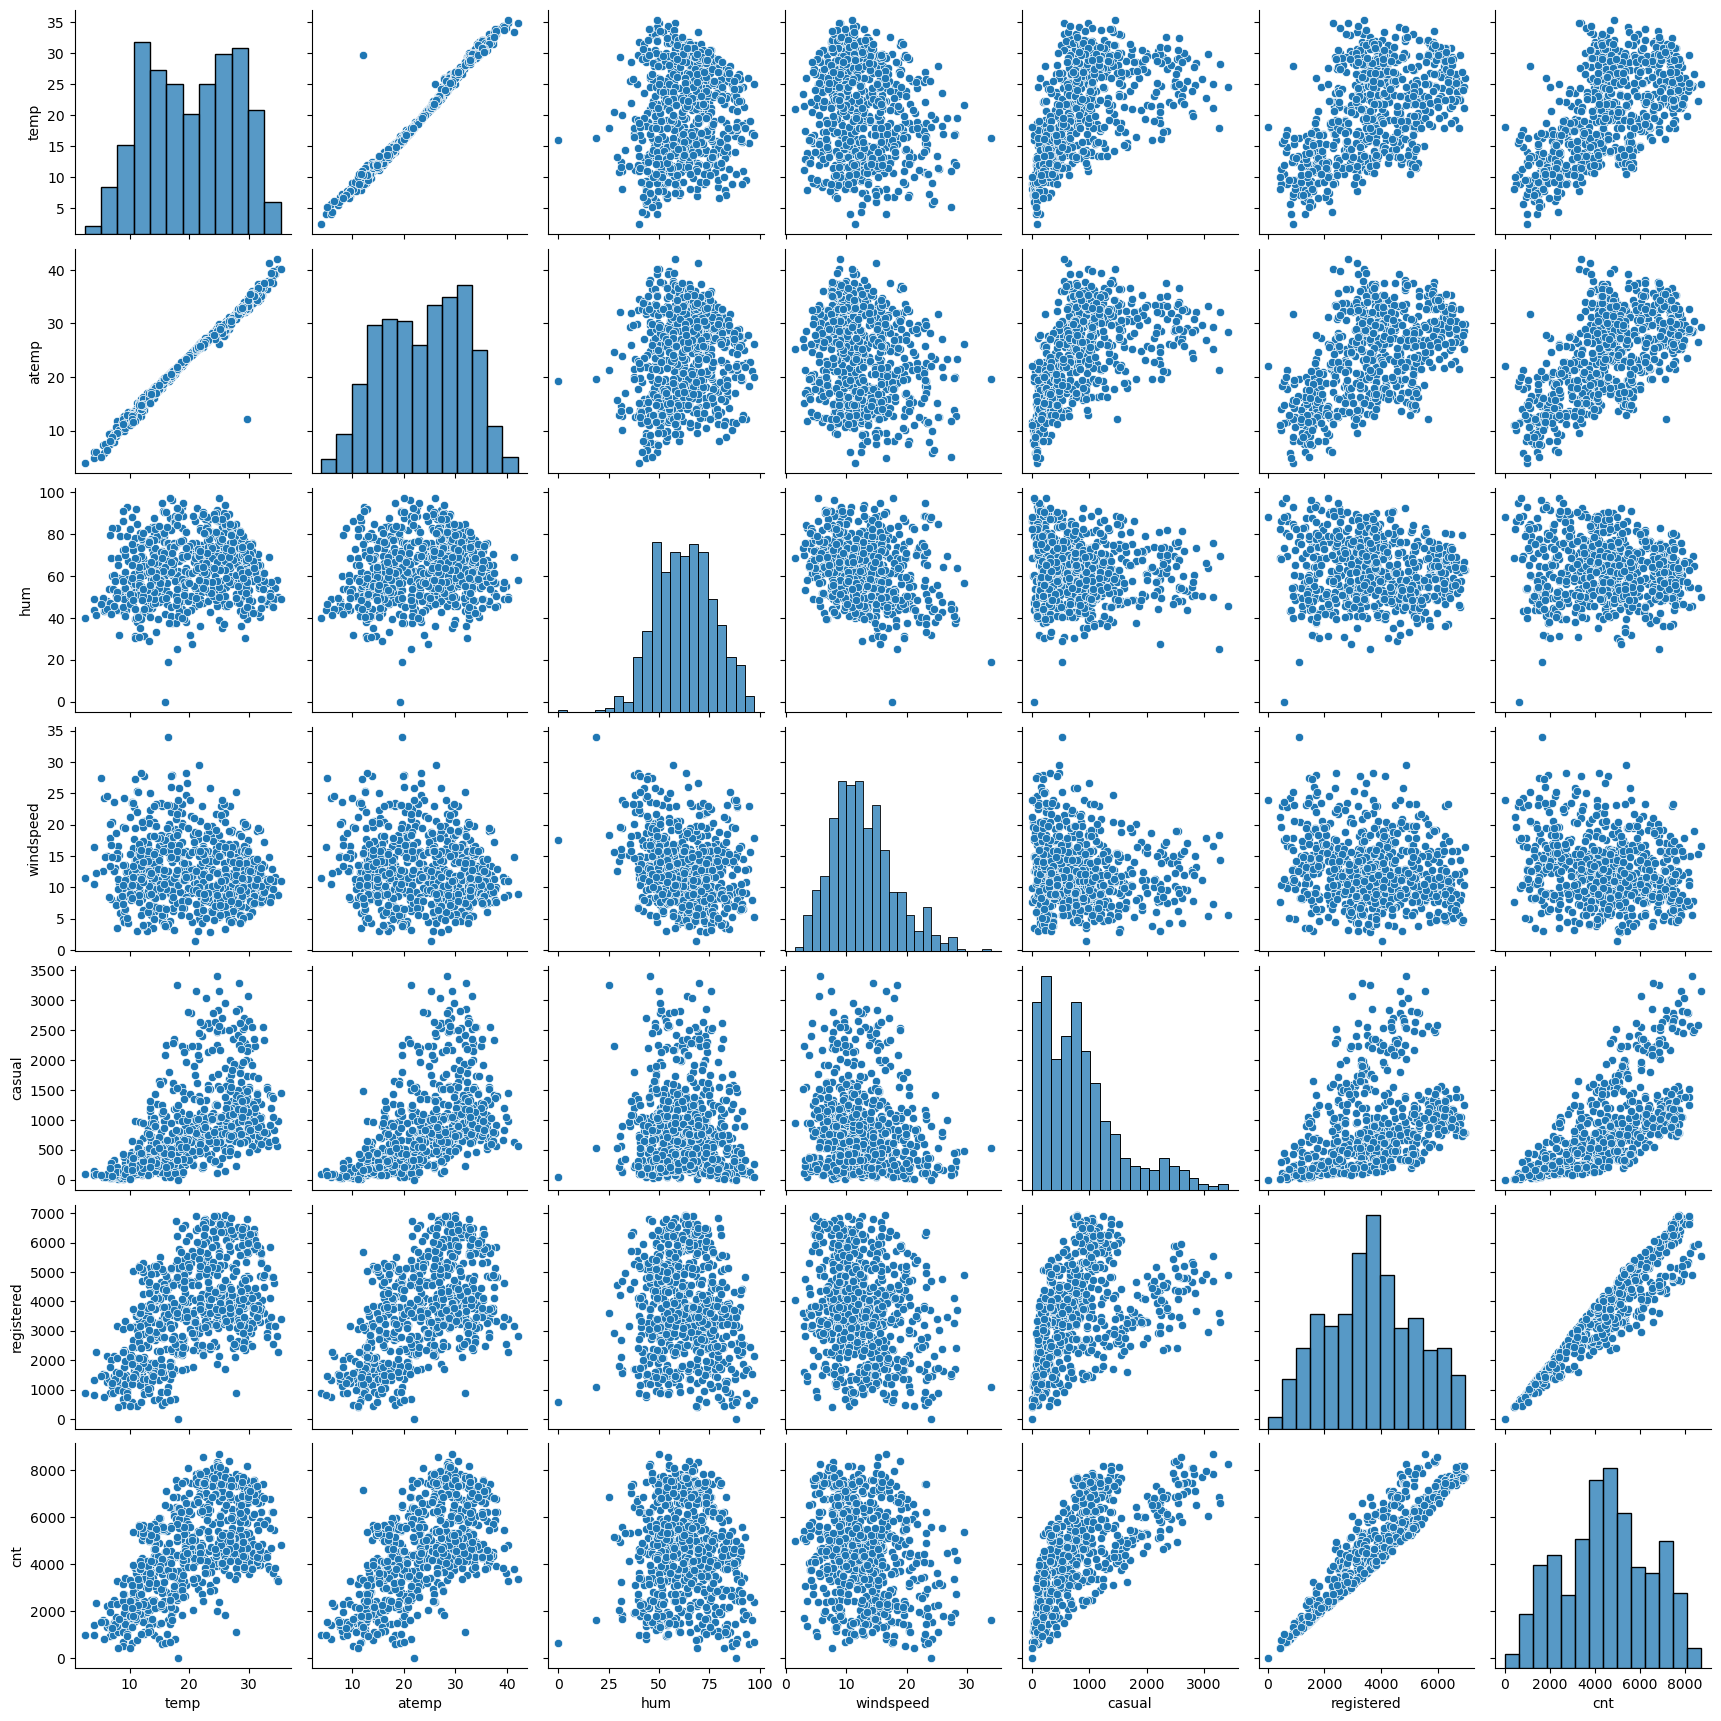

In [10]:
# variables 'temp', 'atemp', 'hum', 'windspeed','registered','casual','cnt' are the numeric variables
# Plotting pairplot for these


sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

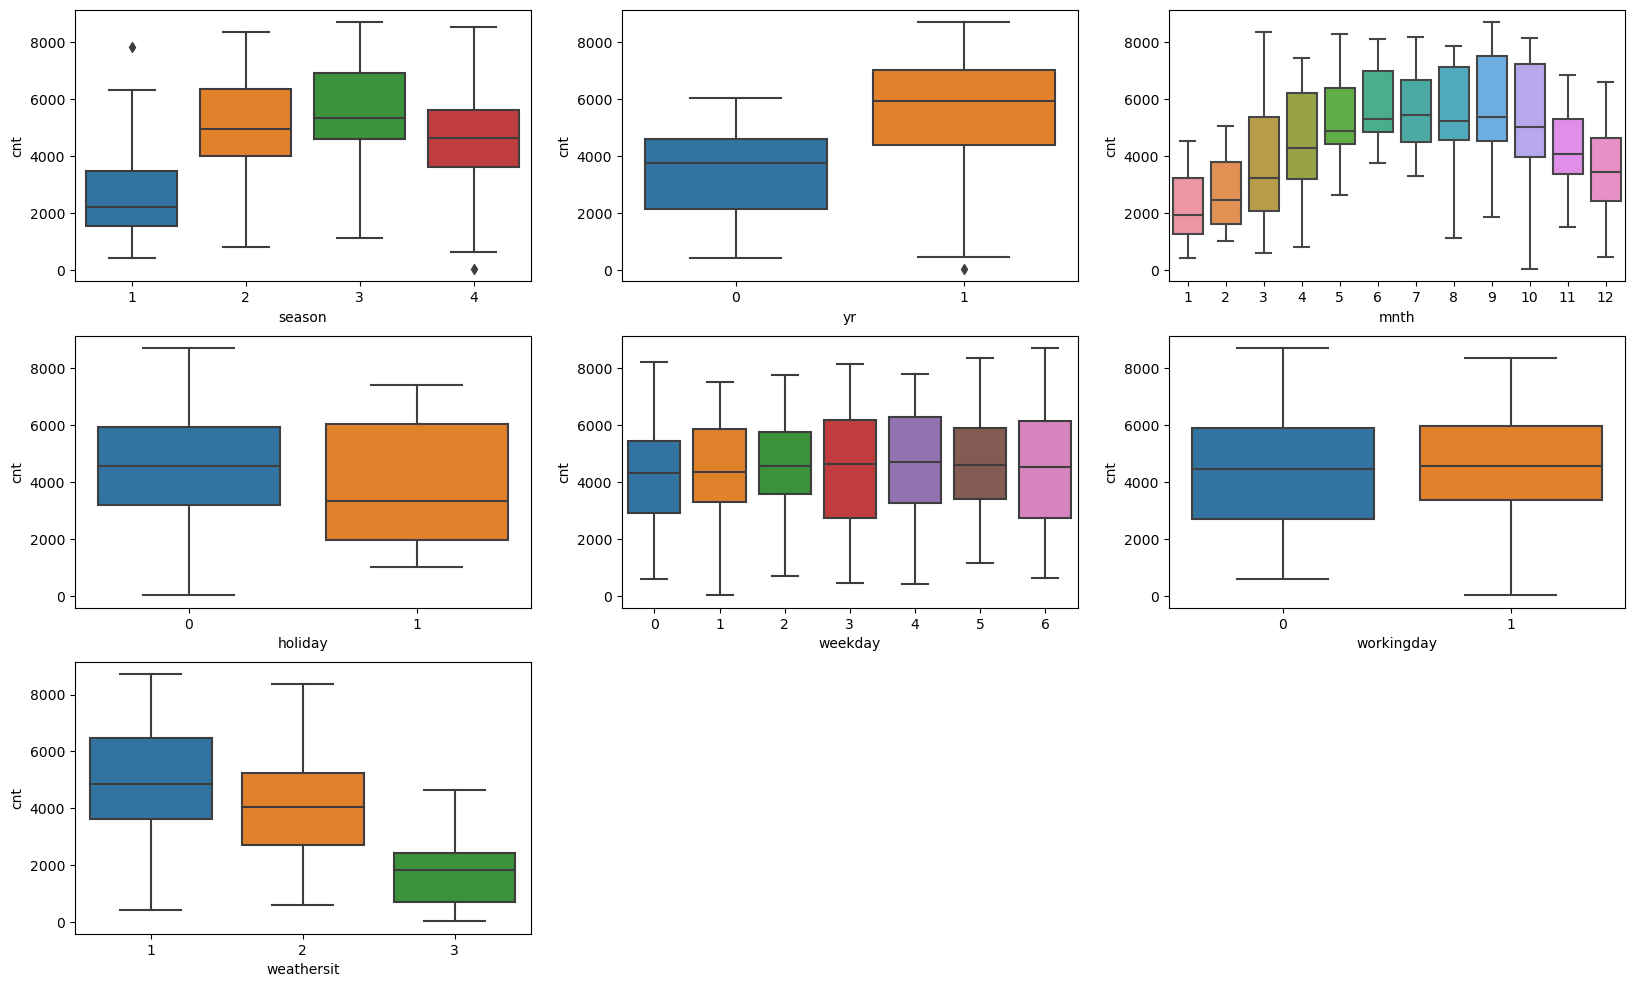

In [19]:
# Visualising categorical variables as boxplot
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

In [ ]:
# Displot of target variable 'cnt'

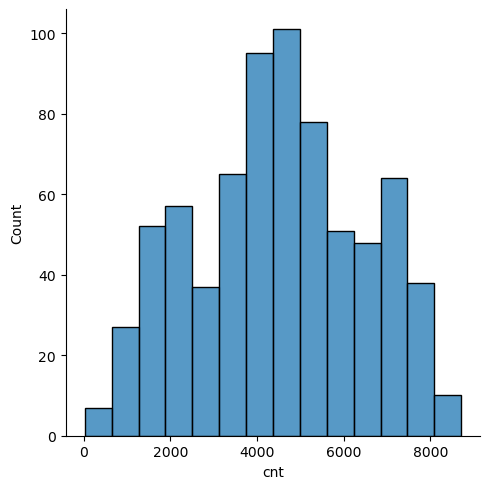

In [159]:
sns.displot(data=df,x='cnt')

In [12]:
# From the above box plots, we can observe that the median count is less in spring compared to other seasons
# median cnt is more for the year 2019 than 2018.
# median cnt incresases each month from Januray till July and then decreases.
# median cnt is more for holiday=0 than holiday=1.
# median cnt is least for weathersit=3.

# Checking for na values
df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [160]:
# Remove columns 'registered' and 'casual' since total count captured in the variable 'cnt'
df=df.drop(['registered','casual'],axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [161]:
# Convert variables 'season', 'weekday','mnth','weathersit' to dummy variables
status=pd.get_dummies(data=df,columns=['season', 'weekday','mnth','weathersit'],drop_first=True)


In [162]:
pd.set_option('display.max_columns', None)

In [163]:
status.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
status.shape

(730, 30)

In [164]:
df=status
df.shape

(730, 30)

In [19]:
# Split data to train and test data in the ratio 70/30

In [165]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [166]:
# Scaling the numeric variables 'temp','atemp','hum','windspeed','cnt' using MinMaxScaler on the training data
col1=['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[col1] = scaler.fit_transform(df_train[col1])

In [167]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


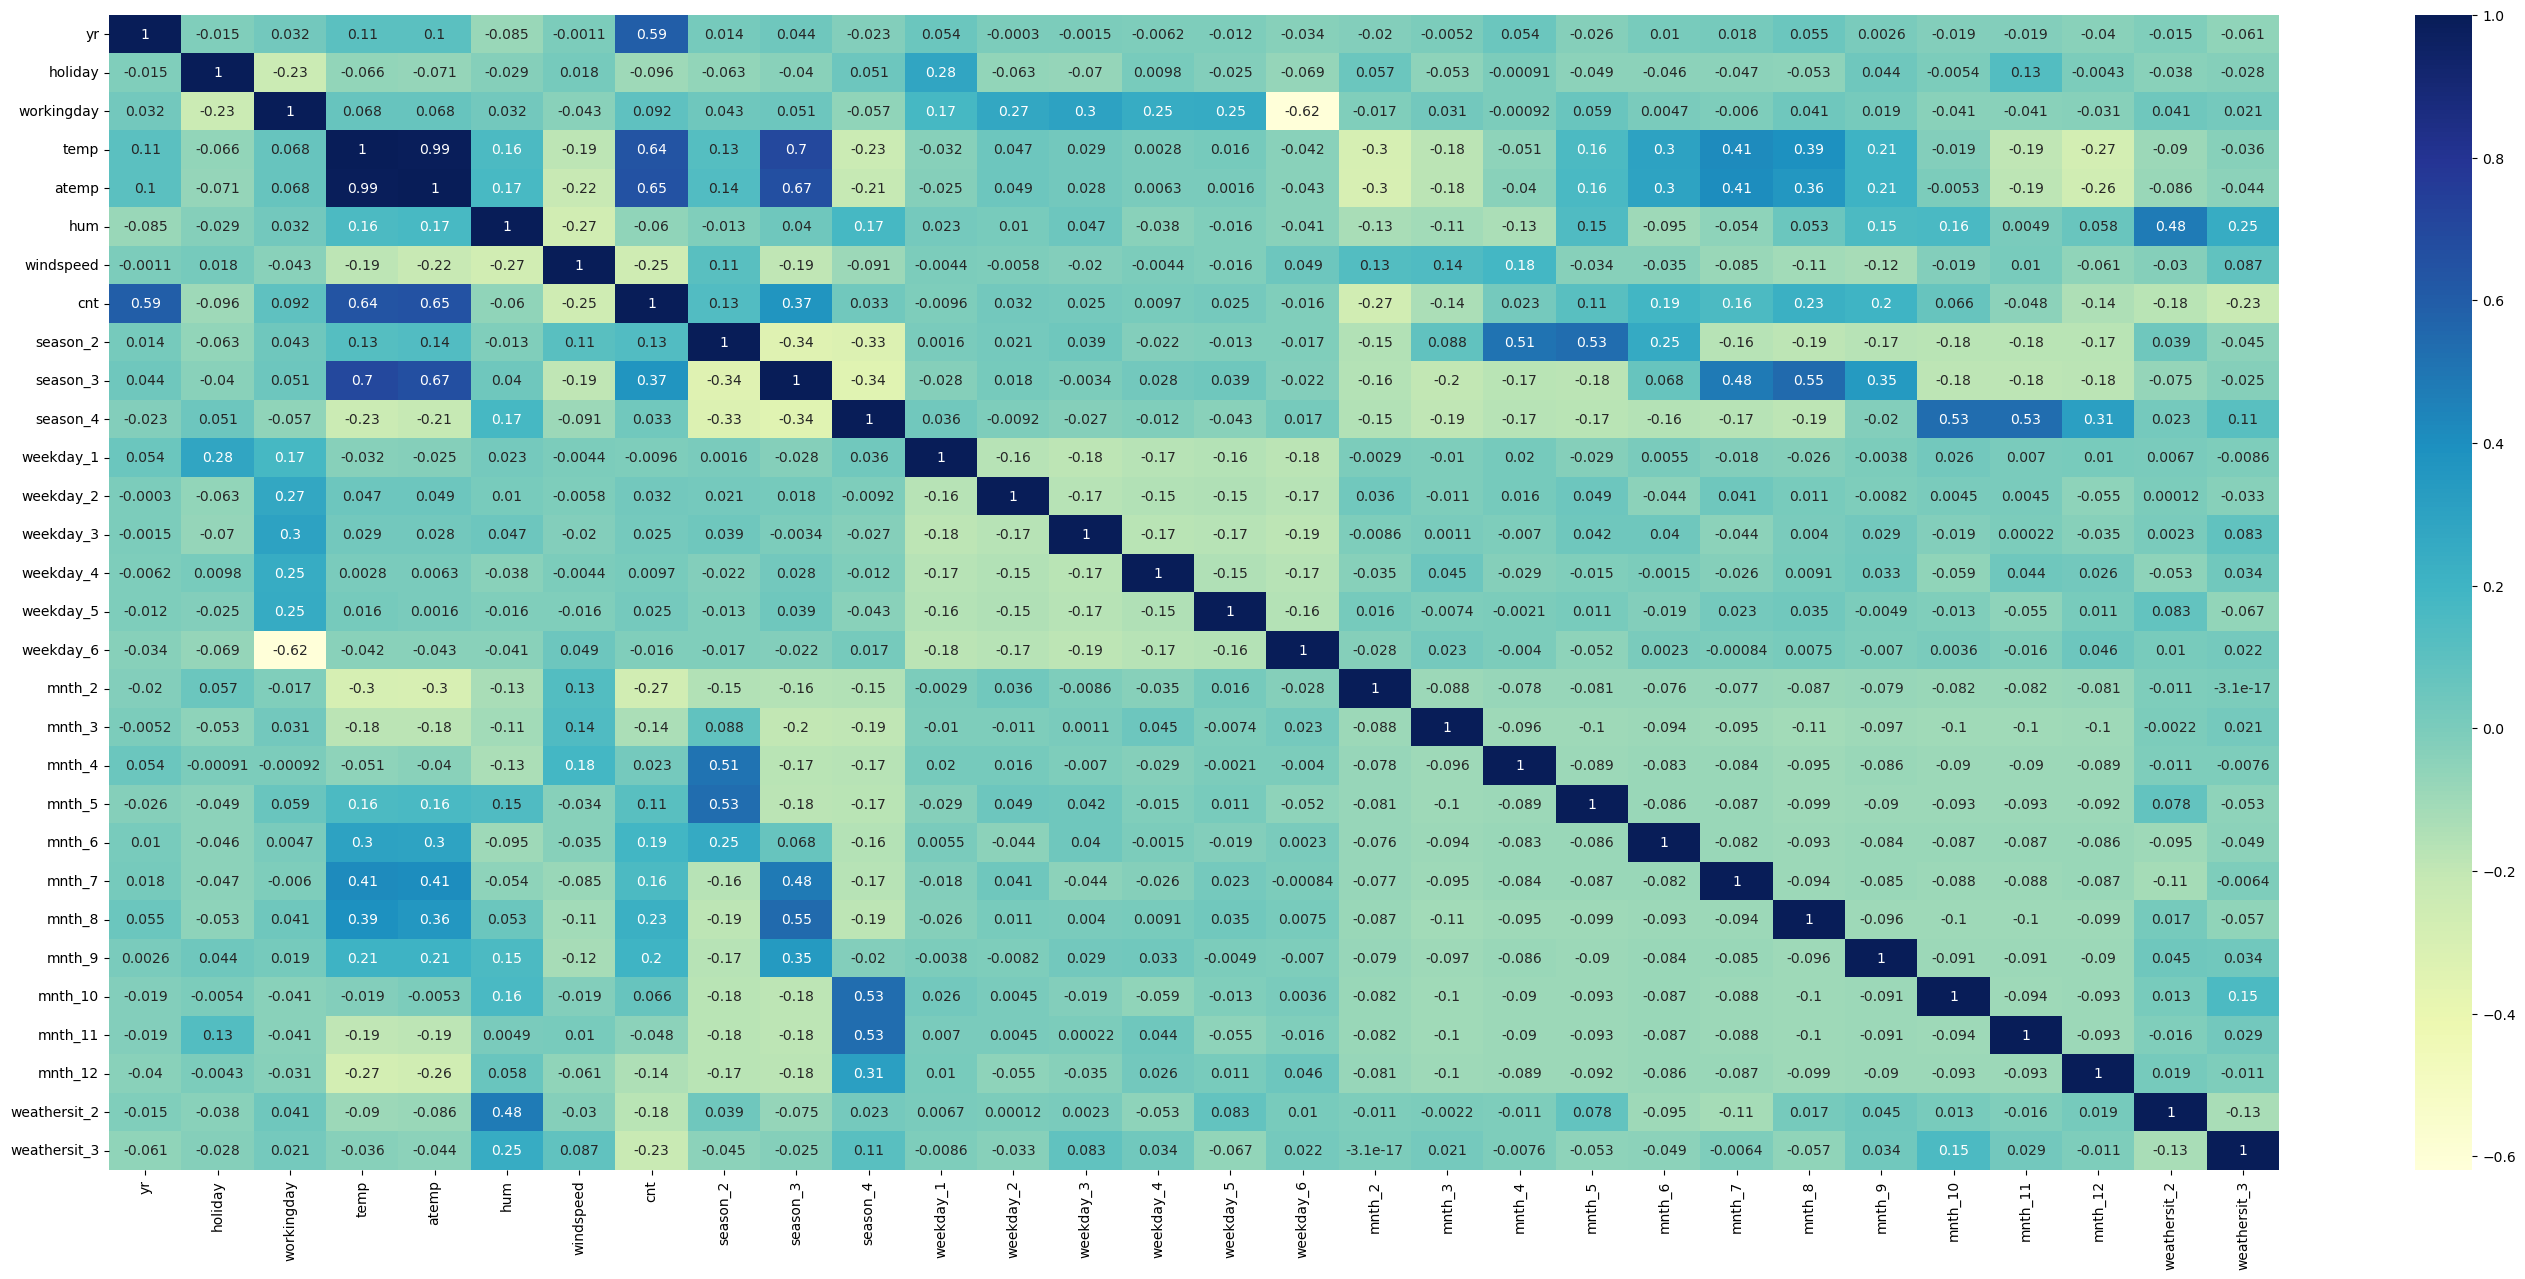

In [59]:
plt.figure(figsize = (35, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# Temp and yr seems to be the most correlated variable influencing cnt


In [168]:
# Divide df_train to X train and Y train
df_train_y=df_train.pop('cnt')
df_train_x=df_train

In [169]:
df_train_y.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [170]:
df_train_x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [171]:
df_train_y.shape

(510,)

In [172]:
df_train_x.shape

(510, 29)

In [146]:
# Building linear model using RFE.

In [173]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [174]:
# Running RFE with the output number of the variable equal to 13
lm= LinearRegression()
lm.fit(df_train_x, df_train_y)

rfe = RFE(lm,n_features_to_select=13)             # running RFE
rfe = rfe.fit(df_train_x, df_train_y)

In [176]:
list(zip(df_train_x.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 4),
 ('mnth_4', False, 6),
 ('mnth_5', False, 5),
 ('mnth_6', False, 7),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 16),
 ('mnth_12', False, 17),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [177]:
col2 = df_train_x.columns[rfe.support_]
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'weekday_6', 'mnth_8', 'mnth_9', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [178]:
# Building model using statsmodel.api for detailed statistics

In [179]:
# Creating x_train dataframe with RFE selected variables
X_train_rfe = df_train_x[col2]

In [180]:
 #Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [181]:
lm = sm.OLS(df_train_y,X_train_rfe).fit()   # Running the linear model

In [182]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.81e-192
Time:                        17:11:01   Log-Likelihood:                 516.20
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.029      6.532   

In [183]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.94
3,workingday,1.88
5,hum,1.87
9,weekday_6,1.78
12,weathersit_2,1.57
4,temp,1.54
10,mnth_8,1.44
7,season_2,1.37
8,season_4,1.32
13,weathersit_3,1.24


In [184]:
# Variable 'holiday' has high p-value. Hence dropping the variable 'holiday'.
x_train_new=X_train_rfe.drop(['holiday'],axis=1)

In [185]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(df_train_y,X_train_lm).fit()   # Running the linear model

In [186]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.47e-192
Time:                        17:12:13   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

In [187]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.45
4,hum,1.87
2,workingday,1.65
8,weekday_6,1.65
11,weathersit_2,1.57
3,temp,1.54
9,mnth_8,1.44
6,season_2,1.37
7,season_4,1.32
12,weathersit_3,1.24


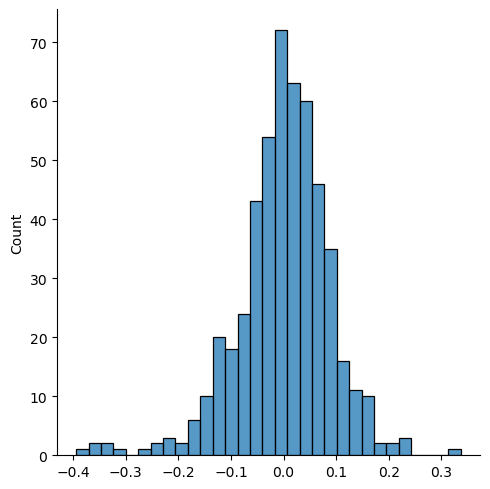

In [188]:
# Predicted y train variable

y_train_price = lm.predict(X_train_lm)

# Residual analysis of train data

er=df_train_y-y_train_price
sns.displot(er)

In [ ]:
#R2 score of train data

In [204]:
from sklearn.metrics import r2_score
r2_score(df_train_y, y_train_price)

0.844947437184701

In [189]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [190]:
# Making predictions on test data using the model
numvars=['temp','atemp','hum','windspeed','cnt']
df_test[numvars]=scaler.transform(df_test[numvars])

In [191]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [192]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
df_test_y=df_test.pop('cnt')
df_test_x=df_test

In [194]:
df_test_sm=sm.add_constant(df_test_x)

In [198]:
df_test_sm_x=df_test_sm.drop(['atemp','season_3','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_11','mnth_12','holiday','mnth_10'],axis=1)

In [199]:
df_test_sm_x.head()

,const,yr,workingday,temp,hum,windspeed,season_2,season_4,weekday_6,mnth_8,mnth_9,weathersit_2,weathersit_3
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,1,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [200]:
y_pred_sm = lm.predict(df_test_sm_x)

In [ ]:
# Checking assumptions about normal distribution of error term

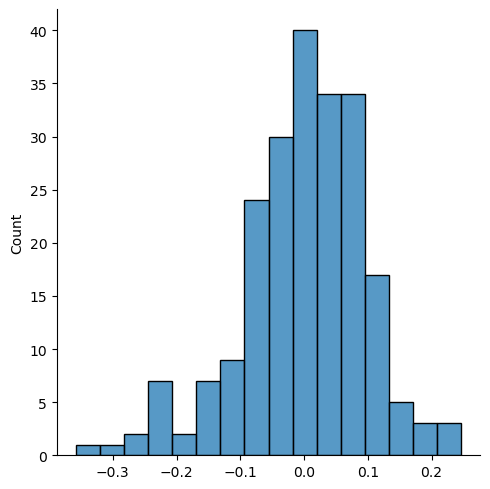

In [201]:
er=df_test_y-y_pred_sm
sns.displot(er)

Text(0, 0.5, 'cnt')

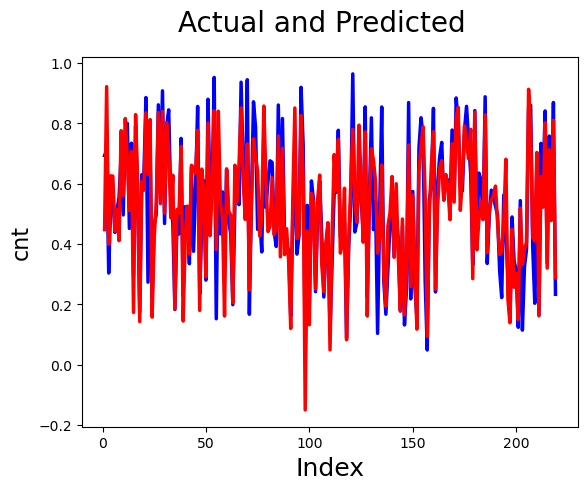

In [202]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,df_test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_sm, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)                               # Y-label

In [ ]:
#R2 score of test data

In [203]:
from sklearn.metrics import r2_score
r2_score(df_test_y, y_pred_sm)

0.8076038501359333

# Model 2

In [86]:
# Import necessasry libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read CSV file

df=pd.read_csv("day.csv")


In [87]:
# Derived variable by getting quarter of the year from mnth variable

def condition(x):
    if 1<=x<=3:
        return 1
    elif 4<=x<=6:
        return 2
    elif 7<=x<=9:
        return 3
    else:
        return 4
    
df['qrtr']=df['mnth'].apply(condition)

In [88]:
df['qrtr'].value_counts()

3    184
4    184
2    182
1    180
Name: qrtr, dtype: int64

In [89]:
# Remove columns 'mnth',registered' and 'casual' since total count captured in the variable 'cnt'
df=df.drop(['instant','dteday','mnth','registered','casual'],axis=1)
df

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,qrtr
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,4
726,1,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,4
727,1,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,4
728,1,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,4


In [90]:
# Convert variables 'season', 'weekday','mnth','weathersit' to dummy variables
status=pd.get_dummies(data=df,columns=['season', 'weekday','weathersit','qrtr'],drop_first=True)
pd.set_option('display.max_columns', None)
status.head()
df=status
df.shape

(730, 22)

In [91]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [92]:
# Split data to train and test data in the ratio 70/30
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 22)
(219, 22)


In [93]:
# Scaling the numeric variables 'temp','atemp','hum','windspeed','cnt' using MinMaxScaler on the training data
col1=['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[col1] = scaler.fit_transform(df_train[col1])

In [94]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,1,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,1,1,0,1,0,0


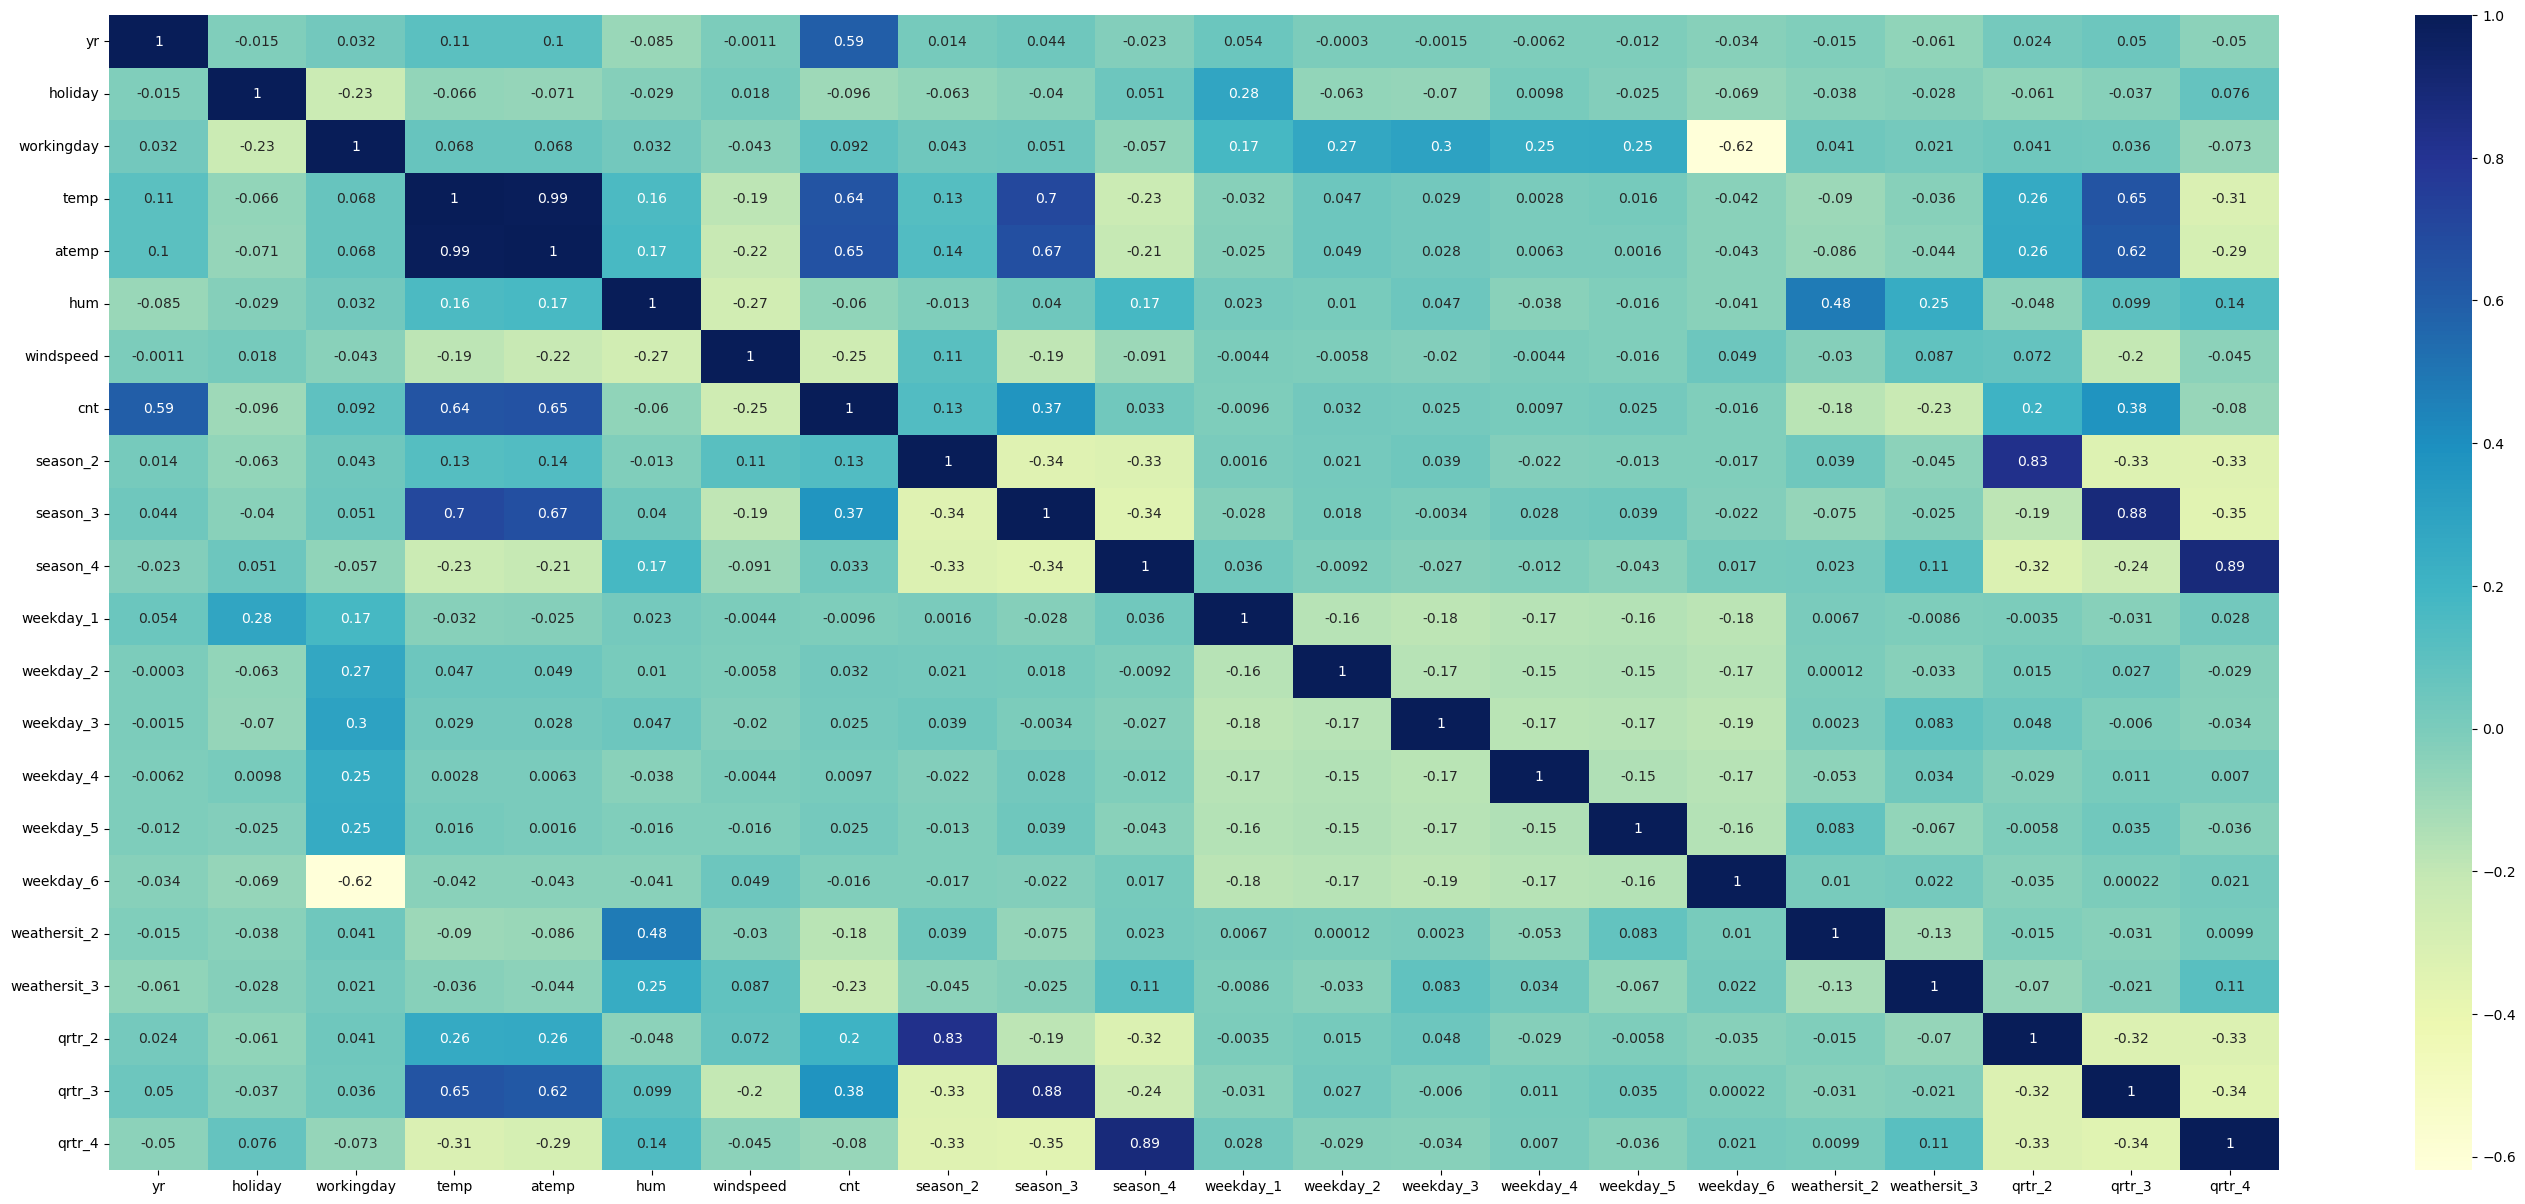

In [11]:
plt.figure(figsize = (35, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [95]:
# Divide df_train to X train and Y train
df_train_y=df_train.pop('cnt')
df_train_x=df_train

In [96]:
df_train_y.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [97]:
df_train_x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,1,0,1,0,0


In [98]:
# Building linear model using RFE.

In [99]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [100]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(df_train_x, df_train_y)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(df_train_x, df_train_y)

In [101]:
list(zip(df_train_x.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 4),
 ('weekday_3', False, 6),
 ('weekday_4', False, 7),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('qrtr_2', False, 2),
 ('qrtr_3', True, 1),
 ('qrtr_4', True, 1)]

In [102]:
col2 = df_train_x.columns[rfe.support_]
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weekday_6', 'weathersit_2',
       'weathersit_3', 'qrtr_3', 'qrtr_4'],
      dtype='object')

In [103]:
# Building model using statsmodel.api for detailed statistics
# Creating x_train dataframe with RFE selected variables
X_train_rfe = df_train_x[col2]

In [104]:
 #Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [105]:
lm = sm.OLS(df_train_y,X_train_rfe).fit()   # Running the linear model

In [106]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.29e-182
Time:                        17:02:28   Log-Likelihood:                 498.98
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     494   BIC:                            -898.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1778      0.030      5.966   

In [107]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,58.12
5,atemp,53.49
0,const,53.05
9,season_3,8.63
10,season_4,6.29
15,qrtr_4,6.01
14,qrtr_3,5.67
8,season_2,2.57
6,hum,1.91
3,workingday,1.87


In [108]:
# Variable 'atemp' has high p-value and high VIF. Hence dropping hte variable 'atemp'.
x_train_new=X_train_rfe.drop(['atemp'],axis=1)

In [109]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(df_train_y,X_train_lm).fit()   # Running the linear model

In [110]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.00e-183
Time:                        17:02:34   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     495   BIC:                            -904.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1784      0.030      5.997   

In [111]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.91
8,season_3,8.58
9,season_4,6.29
14,qrtr_4,6.00
13,qrtr_3,5.67
4,temp,3.58
7,season_2,2.57
5,hum,1.91
3,workingday,1.87
10,weekday_6,1.78


In [112]:
# Variable 'qrtr_4' has high p-value and high VIF. Hence dropping hte variable 'qrtr_4'.
x_train_neww=X_train_lm.drop(['qrtr_4'],axis=1)

In [113]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_lmm = sm.add_constant(x_train_neww)
lmm = sm.OLS(df_train_y,X_train_lmm).fit()   # Running the linear model

In [114]:
print(lmm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.93e-184
Time:                        17:02:47   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     496   BIC:                            -908.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1771      0.030      5.950   

In [115]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lmm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.86
8,season_3,7.92
13,qrtr_3,4.74
4,temp,3.54
7,season_2,2.55
5,hum,1.89
3,workingday,1.87
9,season_4,1.87
10,weekday_6,1.78
11,weathersit_2,1.57


In [116]:
# Variable 'season_3' has high p-value. Hence dropping the variable 'season_3'.
x_train_newww=X_train_lmm.drop(['season_3'],axis=1)

In [117]:
#Adding a constant variable 
import statsmodels.api as sm  
X_train_lmmm = sm.add_constant(x_train_newww)
lmmm = sm.OLS(df_train_y,X_train_lmmm).fit()   # Running the linear model

In [118]:
print(lmmm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.13e-185
Time:                        17:02:53   Log-Likelihood:                 496.98
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     497   BIC:                            -912.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1779      0.030      5.975   

In [119]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lmmm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.83
12,qrtr_3,2.86
4,temp,2.43
3,workingday,1.87
5,hum,1.86
7,season_2,1.84
9,weekday_6,1.78
10,weathersit_2,1.57
8,season_4,1.44
11,weathersit_3,1.24


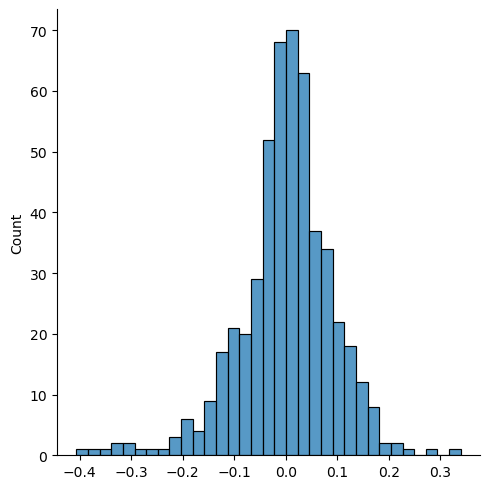

In [120]:
# Predicted y train variable

y_train_price = lmmm.predict(X_train_lmmm)

# Residual analysis of train data

er=df_train_y-y_train_price
sns.displot(er)

In [121]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,1,0,0,0,0,0,1,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,0,0,1,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,1,0,0,0,0,0,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [122]:
# Making predictions on test data using the model
numvars=['temp','atemp','hum','windspeed','cnt']
df_test[numvars]=scaler.transform(df_test[numvars])


In [123]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,1,0,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,1,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,1,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [124]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,qrtr_2,qrtr_3,qrtr_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397,0.273973,0.251142,0.242009
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612,0.447017,0.434663,0.429281
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
df_test_y=df_test.pop('cnt')
df_test_x=df_test

In [126]:
df_test_sm=sm.add_constant(df_test_x)

In [127]:
df_test_sm_x=df_test_sm.drop(['atemp','season_3','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','qrtr_4','qrtr_2'],axis=1)

In [128]:
df_test_sm_x.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,weekday_6,weathersit_2,weathersit_3,qrtr_3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [129]:
y_pred_sm = lmmm.predict(df_test_sm_x)

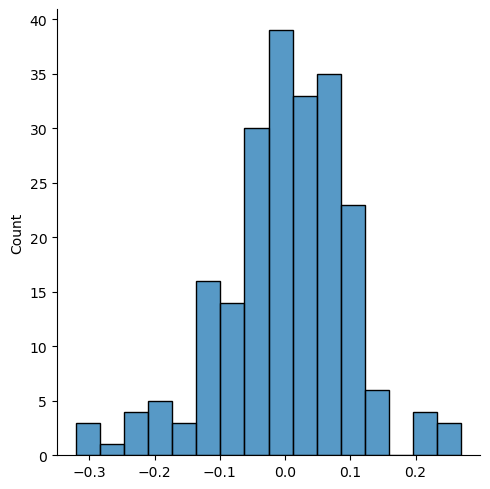

In [130]:
er=df_test_y-y_pred_sm
sns.displot(er)

Text(0, 0.5, 'cnt')

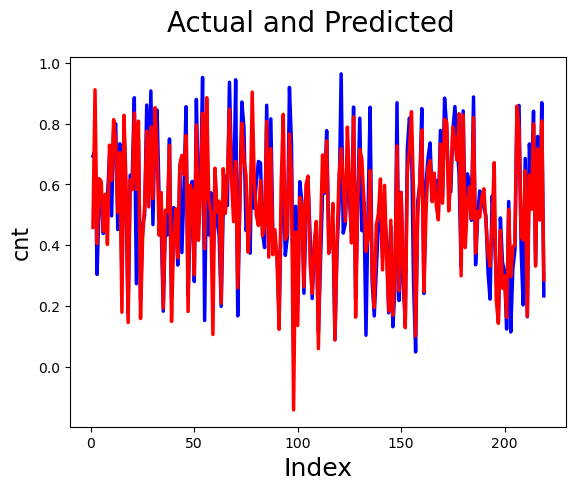

In [51]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,df_test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_sm, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)                               # Y-label

In [ ]:
#R2 score of train data

In [132]:
from sklearn.metrics import r2_score
r2_score(df_train_y, y_train_price)

0.8343590710383733

In [ ]:
#R2 score of test data

In [131]:
from sklearn.metrics import r2_score
r2_score(df_test_y, y_pred_sm)

0.798803250495187

# Result

In [ ]:
# First model had mnths varibale encoded to 11 dummies, and the second model had 'mnths' variable which was derived to new metric called 'qrtr'.

# First model had train data R2=0.84 and test data R2= 0.80

# Second model had train data R2=0.83 and test data R2= 0.79.

# Hence we conclude that the first model is better.